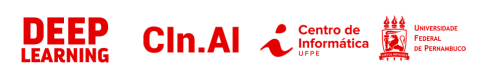

In [5]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted')

# Para codificação Bag-of-words
from sklearn.feature_extraction.text import CountVectorizer

# Modelos
from sklearn.svm import SVC

# métricas
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [6]:
# conectar drive
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/Proj_Luciano/"

Mounted at /content/drive


In [3]:
file = "bd_aval_galaxy.csv"
pathfile = path + file

aval_galaxy_df = pd.read_csv(pathfile, index_col=False, encoding='ISO-8859-1', sep=";")

aval_galaxy_df.head()

,aparelho,ord,avaliacao,estrela
0,a23,34.0,Maravilhoso! Entregou antes da data prevista.,5
1,a23,41.0,A qualidade da cmera frontal deveria melhorar.,3
2,a23,48.0,"Entrega r pida, produto perfeito.",5
3,a23,55.0,Comprei para minha sobrinha e ela est adorand...,5
4,a23,62.0,Muito bom!!!,5


In [4]:
aval_galaxy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   aparelho   1720 non-null   object 
 1   ord        1175 non-null   float64
 2   avaliacao  1720 non-null   object 
 3   estrela    1720 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 53.9+ KB


In [5]:
print(aval_galaxy_df.groupby('estrela').size())

estrela
1    223
2    122
3    462
4    176
5    737
dtype: int64


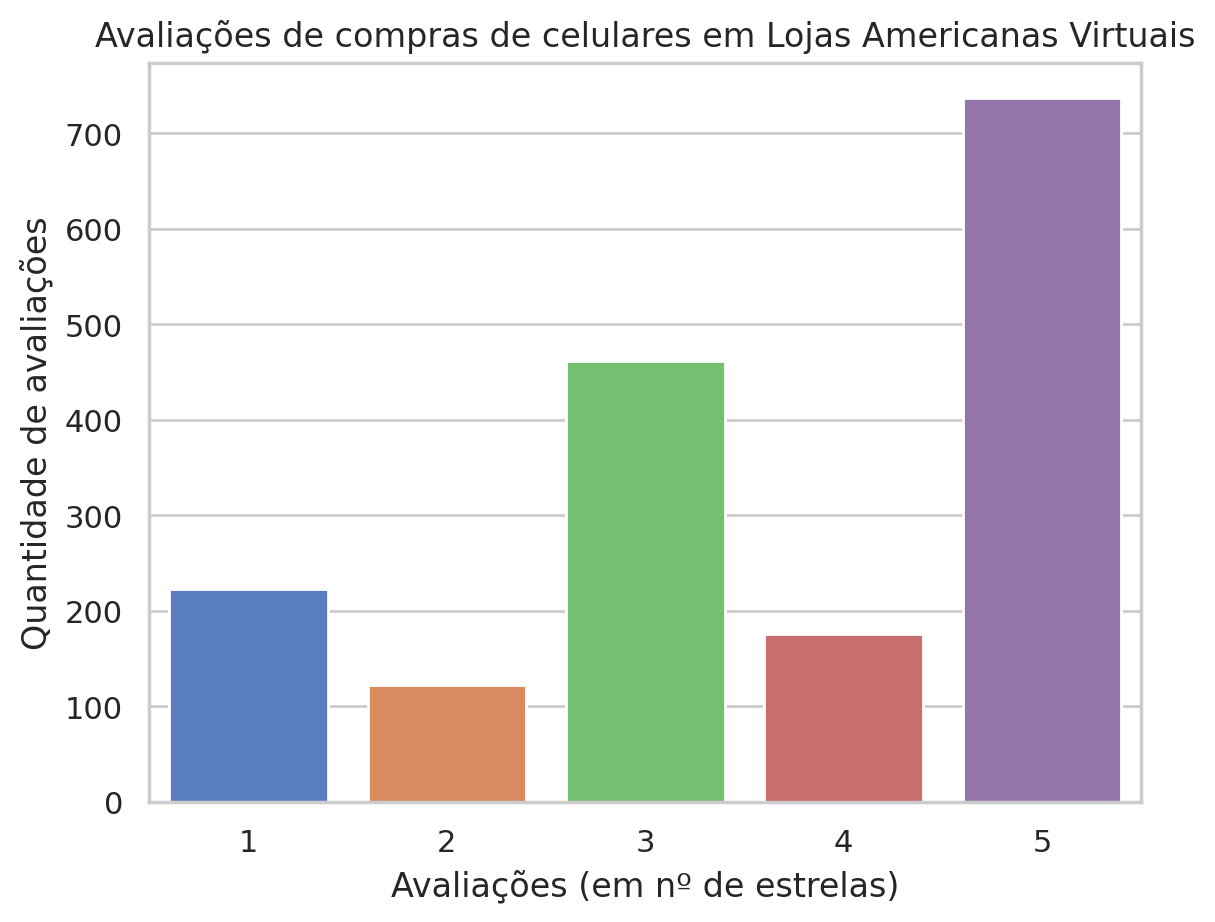

In [6]:
sns.countplot(x ='estrela', data = aval_galaxy_df)
plt.xlabel('Avaliações (em nº de estrelas)');
plt.ylabel('Quantidade de avaliações');
plt.title('Avaliações de compras de celulares em Lojas Americanas Virtuais');


In [7]:
aval_galaxy_df['classe'] = 0
for i in range(len(aval_galaxy_df)):
  if (aval_galaxy_df.estrela[i] >= 4):
    aval_galaxy_df.classe[i] = 1

print(aval_galaxy_df.groupby('classe').size())

<ipython-input-7-7a522019d716>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aval_galaxy_df.classe[i] = 1


classe
0    807
1    913
dtype: int64


In [8]:
class_names = ['Negativa', 'Positiva']

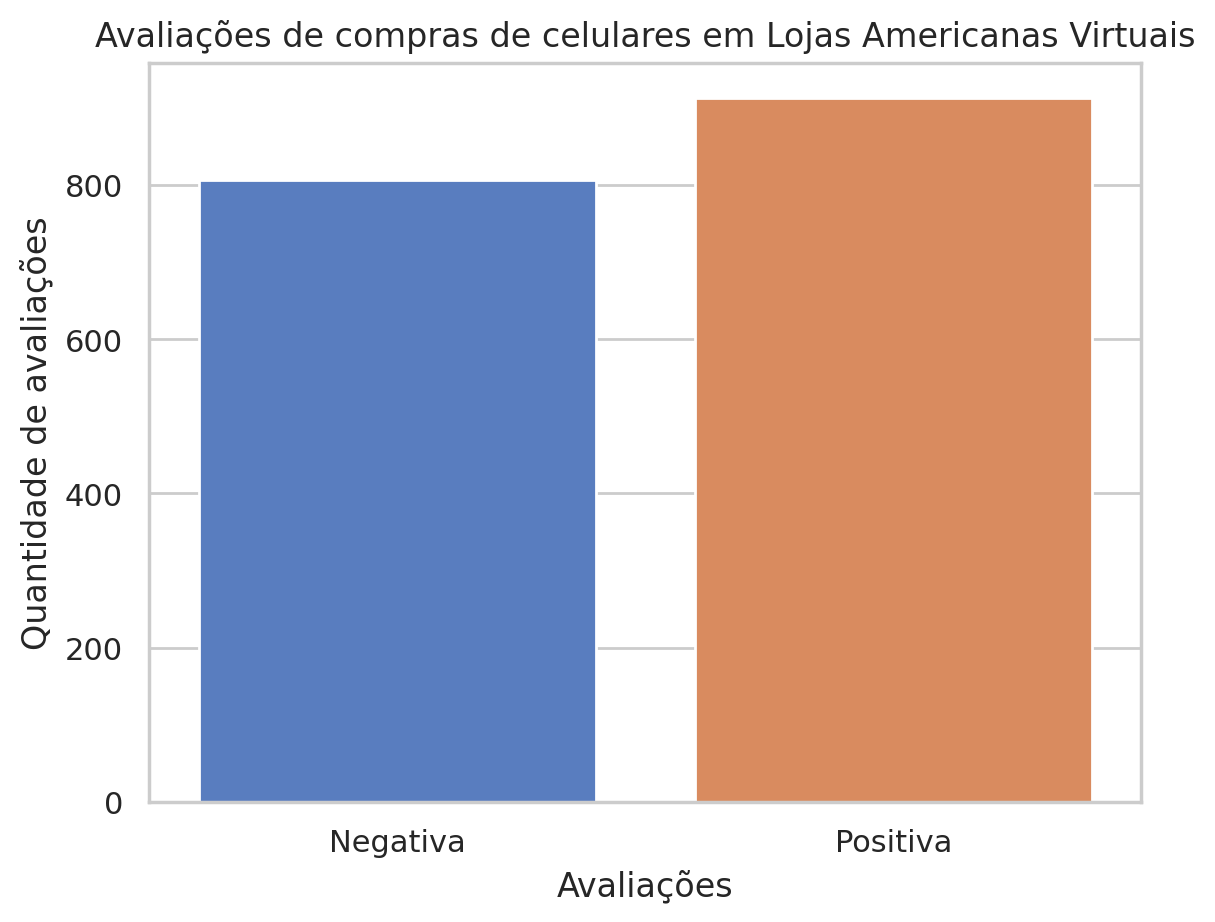

In [9]:
ax = sns.countplot(x ='classe', data = aval_galaxy_df)
plt.xlabel('Avaliações');
plt.ylabel('Quantidade de avaliações');
plt.title('Avaliações de compras de celulares em Lojas Americanas Virtuais')
ax.set_xticklabels(class_names);

In [68]:
X = aval_galaxy_df['avaliacao']
y = aval_galaxy_df['classe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [69]:
X_test.shape
y_test.shape

(516,)

In [70]:
vectorizer = CountVectorizer()    # Bag-of-words

X_train_vectorize = vectorizer.fit_transform(X_train)

#SVM + bow com parâmetros default

In [71]:
clf = SVC()
clf.fit(X_train_vectorize, y_train)

SVC()

In [72]:
X_test_vectorize = vectorizer.transform(X_test)
pred_bow = clf.predict(X_test_vectorize)

print(metrics.classification_report(y_test, pred_bow))

print(clf.classes_)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       245
           1       0.81      0.82      0.81       271

    accuracy                           0.80       516
   macro avg       0.80      0.80      0.80       516
weighted avg       0.80      0.80      0.80       516

[0 1]


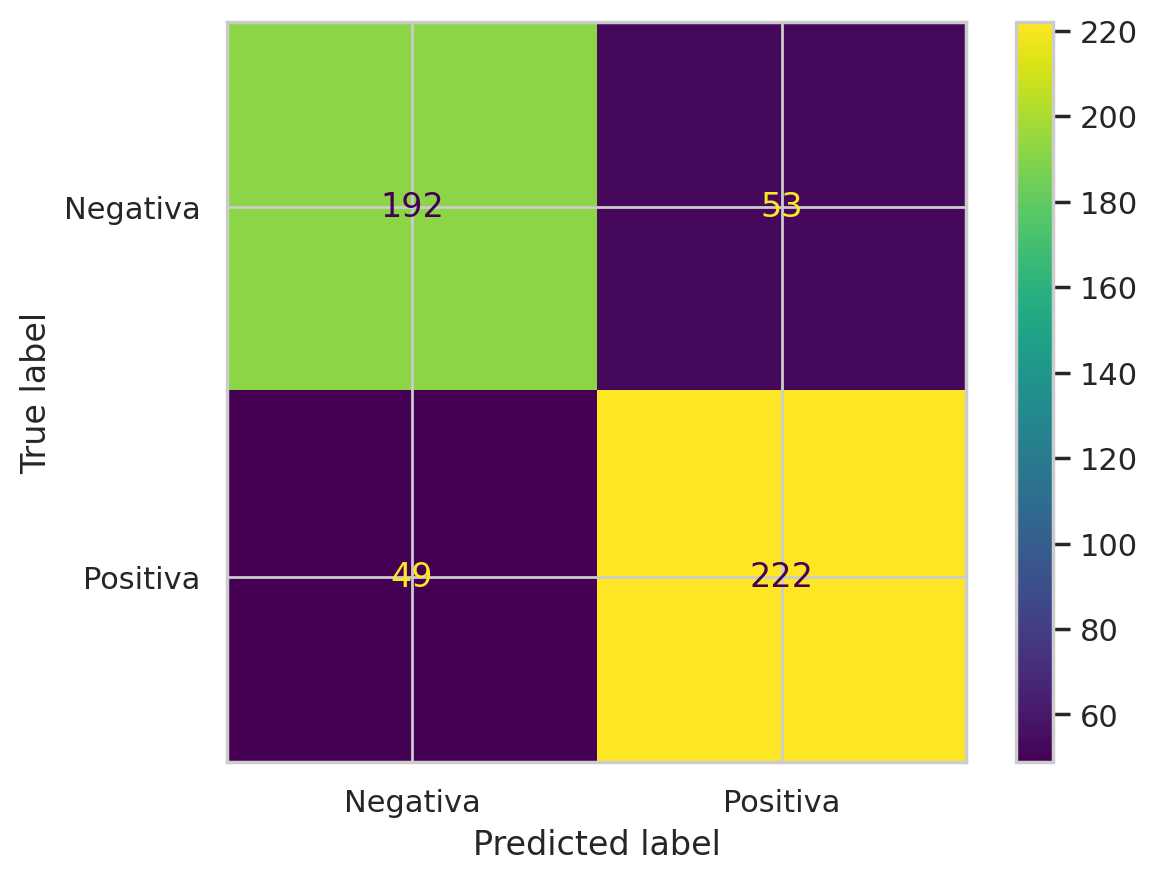

In [73]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_bow)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negativa', 'Positiva'])

cm_display.plot()
#plt.show()

In [74]:
acc_bow = accuracy_score(y_test, pred_bow)
f1_bow = 2 * confusion_matrix[1][1] / (2 * confusion_matrix[1][1] + confusion_matrix[0][1] + confusion_matrix[1][0])

In [75]:
results = {}

In [76]:
results['SVM_BOW_Defaut'] = {'Acc': acc_bow, 'F1': f1_bow}
print(f'Modelo SVM_BOW_Defaut - Acurácia: {acc_bow} | F1 score: {f1_bow}')

Modelo SVM_BOW_Defaut - Acurácia: 0.8023255813953488 | F1 score: 0.8131868131868132


#Grid search de melhores parâmetros para SVM + bow

In [77]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid', 'linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_vectorize, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.533 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.585 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.635 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.610 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.589 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.583 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.813 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             verbose=3)

In [78]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [79]:
grid_pred_bow = grid.predict(X_test_vectorize)

print(metrics.classification_report(y_test, grid_pred_bow))

print(grid.classes_)

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       245
           1       0.79      0.85      0.82       271

    accuracy                           0.80       516
   macro avg       0.81      0.80      0.80       516
weighted avg       0.81      0.80      0.80       516

[0 1]


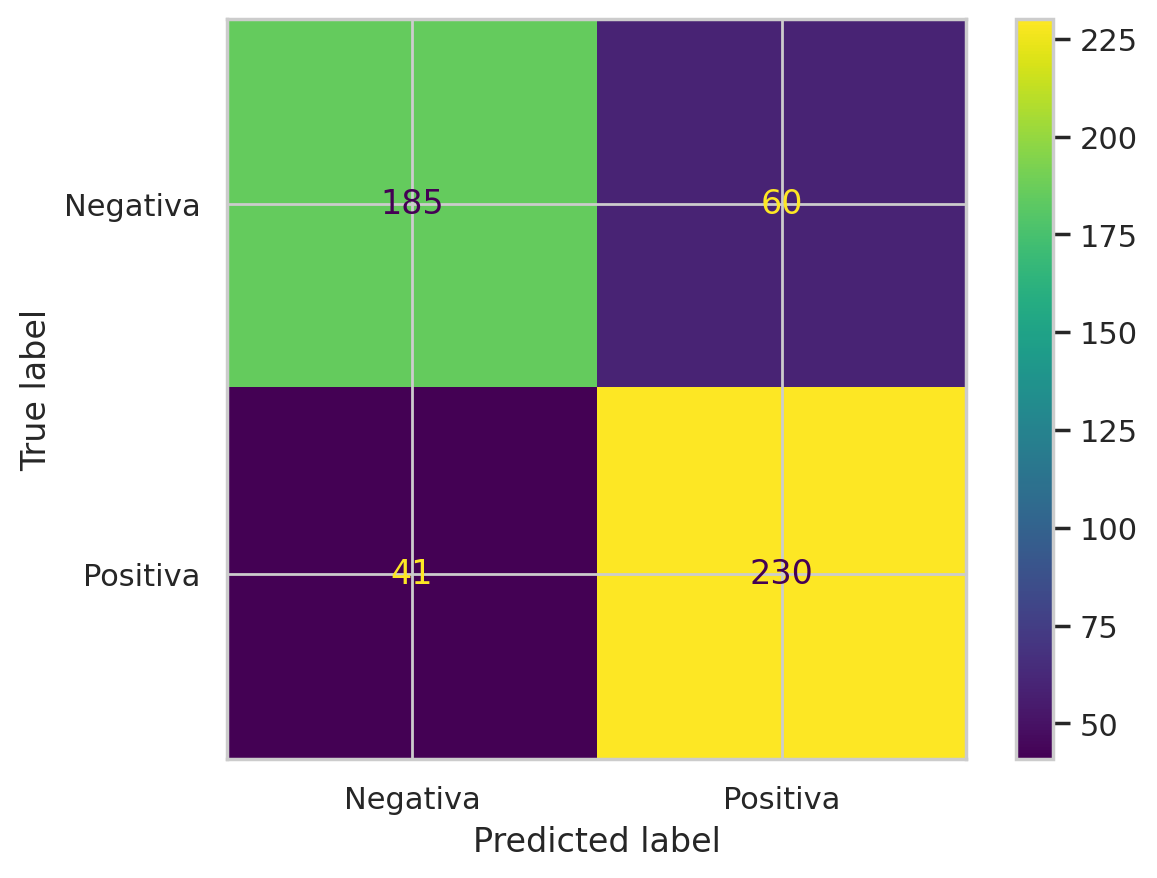

In [80]:
confusion_matrix = metrics.confusion_matrix(y_test, grid_pred_bow)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negativa', 'Positiva'])

cm_display.plot()
#plt.show()

In [81]:
acc_bow_gs = accuracy_score(y_test, grid_pred_bow)
f1_bow_gs = 2 * confusion_matrix[1][1] / (2 * confusion_matrix[1][1] + confusion_matrix[0][1] + confusion_matrix[1][0])

In [82]:
results['SVM_BOW_GS'] = {'Acc': acc_bow_gs, 'F1': f1_bow_gs}
print(f'Modelo SVM_BOW_GS - Acurácia: {acc_bow_gs} | F1 score: {f1_bow_gs}')

Modelo SVM_BOW_GS - Acurácia: 0.8042635658914729 | F1 score: 0.8199643493761141


# SVM + embeddings

In [83]:
import gensim.downloader

In [ ]:
# [CARREGUE word2vec-google-news-300]
word2vec_vectors = gensim.downloader.load('word2vec-google-news-300')

[=================================================-] 99.8% 1658.8/1662.8MB downloaded


In [84]:
# Pré-processamento textual antes de treinar o modelo Word2Vec
import nltk
from nltk.tokenize import word_tokenize
# tokenizador de sentença do nltk
nltk.download('punkt')

texto_tokenizado = [word_tokenize(i, language='portuguese') for i in aval_galaxy_df['avaliacao'].values]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [85]:
len(texto_tokenizado)

1720

In [86]:
from gensim.models import Word2Vec

In [ ]:
word2vec_treinado_aval_galaxy = Word2Vec(texto_tokenizado, vector_size = 50, window=5, min_count=1, workers=4)
word2vec_treinado_aval_galaxy.save("/content/drive/MyDrive/Colab Notebooks/Proj_Luciano/word2vec_treinado_aval_galaxy.model")

In [88]:
word2vec_treinado_aval_galaxy = Word2Vec.load("/content/drive/MyDrive/Colab Notebooks/Proj_Luciano/word2vec_treinado_aval_galaxy.model")

In [89]:
word2vec_treinado_aval_galaxy.wv['durabilidade']

array([-0.00802916,  0.00390951,  0.00119262, -0.00673928,  0.01959052,
       -0.03376588,  0.0316687 ,  0.01358926, -0.02064055, -0.00950971,
       -0.01667094, -0.03147361, -0.00938654,  0.0259346 , -0.0018824 ,
        0.02818512, -0.00577218,  0.01116004, -0.03752883,  0.00829274,
        0.01806254,  0.03778984,  0.00809226,  0.00192666,  0.02740053,
       -0.00301213, -0.01760532,  0.01064109, -0.00869067,  0.00816723,
        0.00759217, -0.0055066 , -0.01747349,  0.01624002, -0.01566914,
        0.01539292,  0.03389096, -0.01813855,  0.0069601 , -0.00220233,
        0.00675537, -0.01136851,  0.01893685,  0.00512874,  0.01977958,
        0.0310275 ,  0.00887824, -0.00257628, -0.00583937, -0.00599189],
      dtype=float32)

In [90]:
# Verificando o tamanho máximo do texto não estruturado (review)
X, y = [], []
max_len = 0

for i, row in aval_galaxy_df.iterrows():
  vetores = word2vec_treinado_aval_galaxy.wv[word_tokenize(row['avaliacao'], language='portuguese')]

  max_len = max(max_len, len(vetores))
  X.append(vetores)
  y.append(row['classe']-1)
print("max_len: {}".format(max_len))

max_len: 224


In [91]:
# Devemos utilizar um padding para padronizar o tamanho das nossas reviews em max_len.
# Isso é necessário para fazer o treino da rede neural

def transform(exemplos, dimension):
  results = np.zeros((len(exemplos), dimension, 50))
  for i, sequence in enumerate(exemplos):
    results[i, :len(sequence), :] = sequence
  return results
 
X = transform(X, max_len)
y = np.array(y).astype("float32")

X.shape
#print(X)
X1 = X.reshape(1720,11200)

X1.shape

(1720, 11200)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=42)

In [93]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [94]:
pred_word2vec = clf.predict(X_test)

print(metrics.classification_report(y_test, pred_word2vec))

print(clf.classes_)

              precision    recall  f1-score   support

        -1.0       0.66      0.60      0.63       245
         0.0       0.67      0.72      0.69       271

    accuracy                           0.66       516
   macro avg       0.66      0.66      0.66       516
weighted avg       0.66      0.66      0.66       516

[-1.  0.]


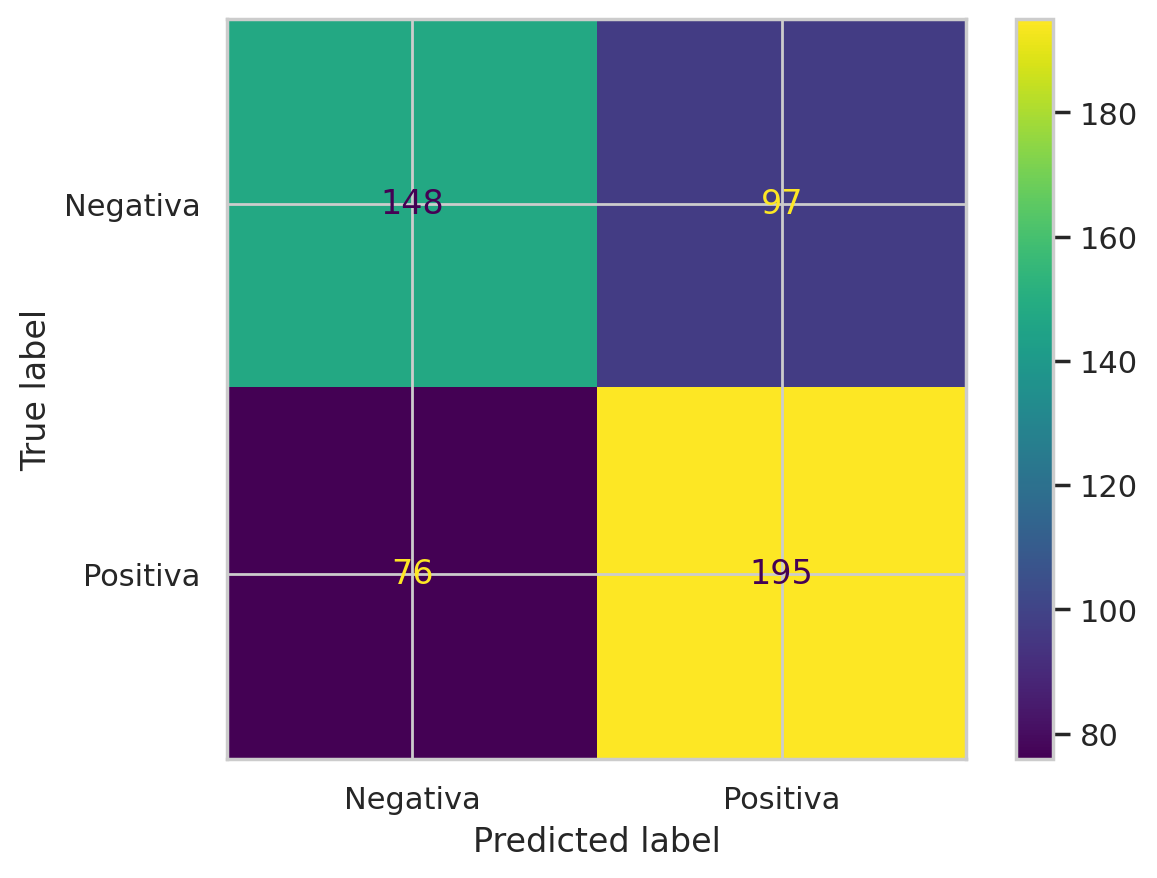

In [95]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_word2vec)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negativa', 'Positiva'])

cm_display.plot()

In [96]:
acc_emb = accuracy_score(y_test, pred_word2vec)
f1_emb = 2 * confusion_matrix[1][1] / (2 * confusion_matrix[1][1] + confusion_matrix[0][1] + confusion_matrix[1][0])

In [97]:
results['SVM_emb'] = {'Acc': acc_emb, 'F1': f1_emb}
print(f'Modelo SVM_Embeddings - Acurácia: {acc_emb} | F1 score: {f1_emb}')

Modelo SVM_Embeddings - Acurácia: 0.6647286821705426 | F1 score: 0.6927175843694494


#Grid search de melhores parâmetros para SVM + embeddings

In [3]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid', 'linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

NameError: ignored

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, gamma=1, kernel='linear')


In [ ]:
grid_pred_word2vec = grid.predict(X_test)

print(metrics.classification_report(y_test, grid_pred_word2vec))

print(grid.classes_)

              precision    recall  f1-score   support

        -1.0       0.74      0.64      0.68       245
         0.0       0.71      0.79      0.75       271

    accuracy                           0.72       516
   macro avg       0.72      0.72      0.72       516
weighted avg       0.72      0.72      0.72       516

[-1.  0.]


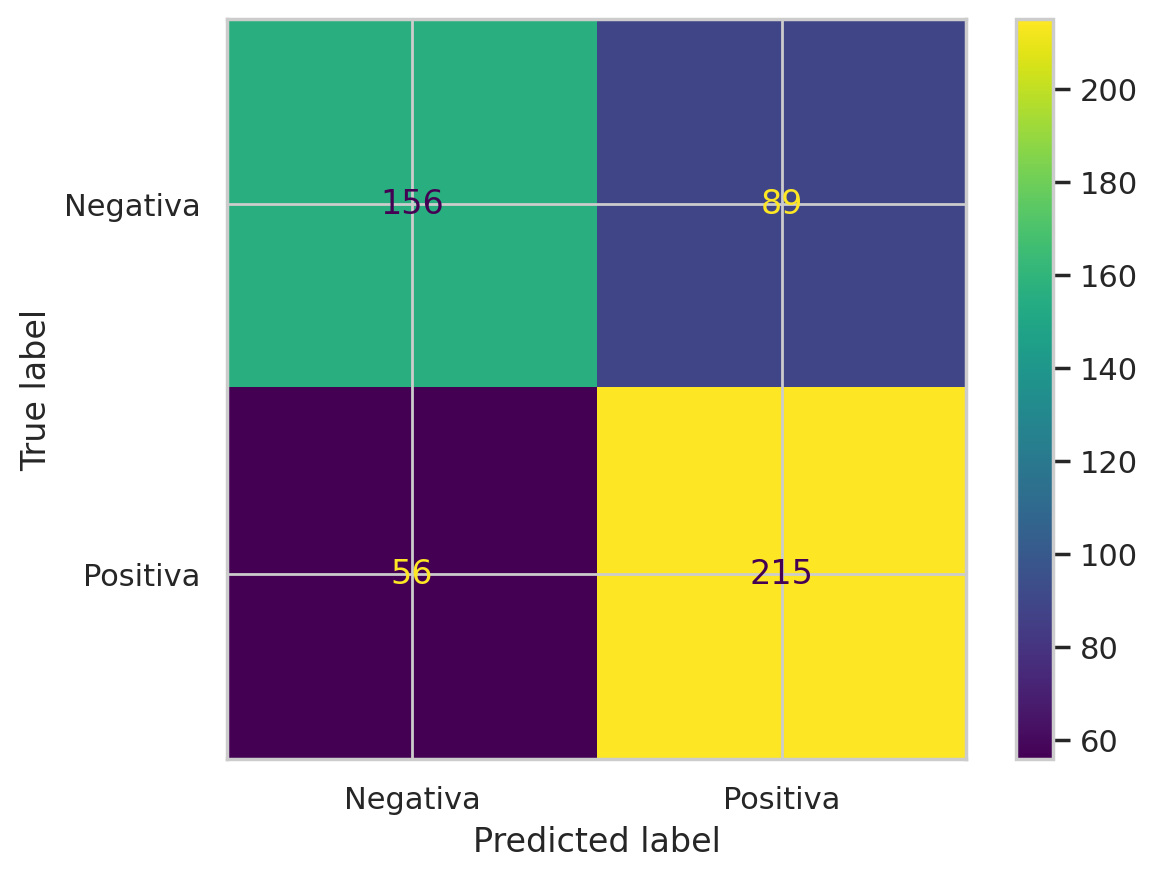

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, grid_pred_word2vec)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negativa', 'Positiva'])

cm_display.plot()

In [ ]:
acc_emb_gs = accuracy_score(y_test, grid_pred_word2vec)
f1_emb_gs = 2 * confusion_matrix[1][1] / (2 * confusion_matrix[1][1] + confusion_matrix[0][1] + confusion_matrix[1][0])

In [ ]:
results['SVM_emb_gs'] = {'Acc': acc_emb_gs, 'F1': f1_emb_gs}
print(f'Modelo SVM_Embeddings_GS - Acurácia: {acc_emb_gs} | F1 score: {f1_emb_gs}')

Modelo SVM_Embeddings_GS - Acurácia: 0.7189922480620154 | F1 score: 0.7478260869565218


In [ ]:
round(pd.DataFrame(results), 3)

,SVM_BOW_Defaut,SVM_BOW_GS,SVM_emb,SVM_emb_gs
Acc,0.802,0.804,0.665,0.719
F1,0.813,0.820,0.693,0.748


In [ ]:
results = pd.DataFrame(results)
arq = 'results.csv'
filepath = path + arq
results.to_csv(filepath)

In [67]:
arq = 'results.csv'
filepath = path + arq
results = pd.read_csv(filepath)
#tsf = tsf.to_numpy()

nomes = ['Métrica','SVM_BOW_Defaut','SVM_BOW_GS','SVM_emb','SVM_emb_gs']

results.columns=nomes


round(pd.DataFrame(results), 3)

ValueError: ignored

In [11]:
!pip install -qq transformers

import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.8 MB/s eta 0:00:00


In [12]:
pre_trained_BERTimbau = 'neuralmind/bert-base-portuguese-cased'

tokenizer = BertTokenizer.from_pretrained(pre_trained_BERTimbau)

In [13]:
sample_txt = 'Quem conta um conto aumenta um ponto'  

tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: Quem conta um conto aumenta um ponto
   Tokens: ['Quem', 'conta', 'um', 'conto', 'aumenta', 'um', 'ponto']
Token IDs: [15807, 1284, 222, 12059, 8101, 222, 2009]


In [14]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=16,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


16


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


tensor([  101, 15807,  1284,   222, 12059,  8101,   222,  2009,   102,     0,
            0,     0,     0,     0,     0,     0])

In [15]:
print(tokenizer.convert_ids_to_tokens(encoding['input_ids'][0]))

['[CLS]', 'Quem', 'conta', 'um', 'conto', 'aumenta', 'um', 'ponto', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [16]:
token_lens = []

for txt in aval_galaxy_df['avaliacao']:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

<ipython-input-17-d7a9422faf64>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


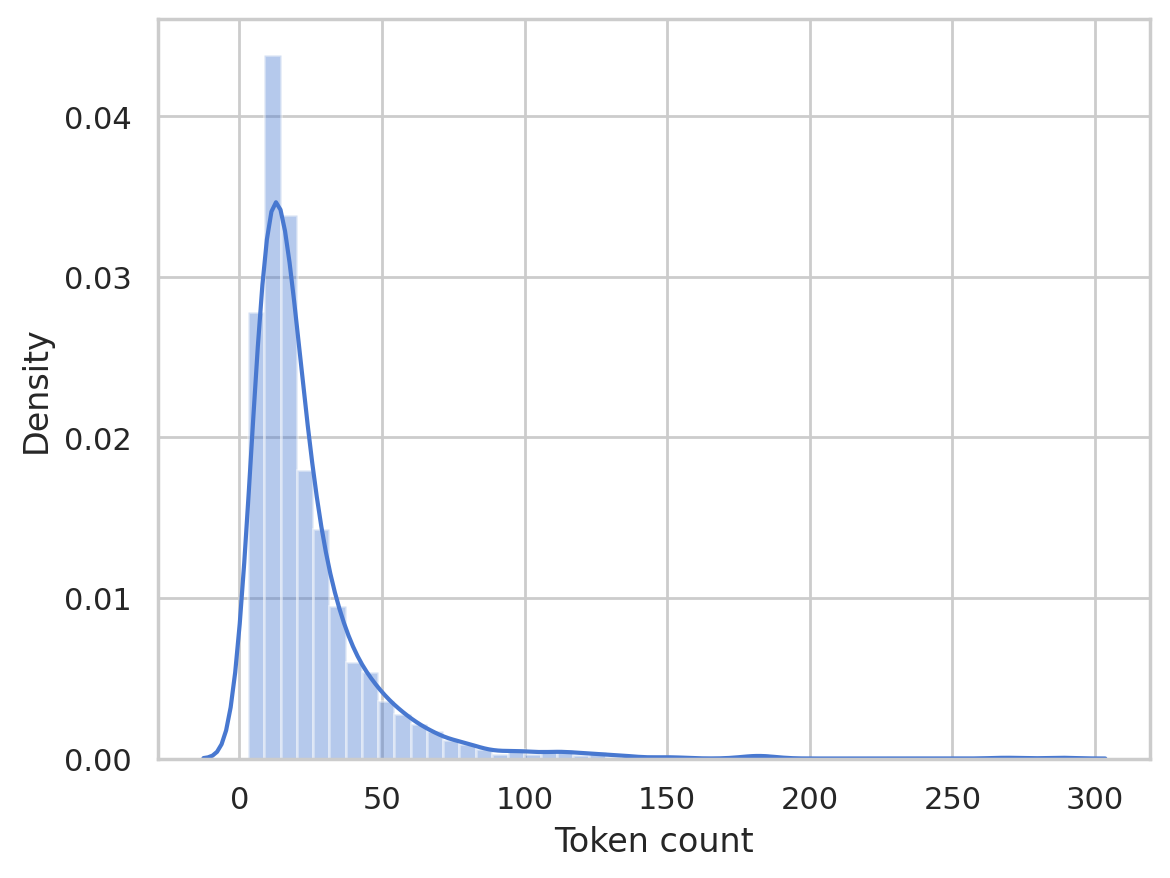

In [17]:
sns.distplot(token_lens)
plt.xlabel('Token count');

In [26]:
MAX_LEN = 300

In [18]:
import torch
from torch import nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
from sklearn import metrics
from collections import defaultdict

In [19]:
class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      #padding='max_len',
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [22]:
df_train, df_test = train_test_split(aval_galaxy_df, test_size=0.3, random_state=RANDOM_SEED)

df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [23]:
df_train.shape, df_val.shape, df_test.shape

((1204, 5), (258, 5), (258, 5))

In [24]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews=aval_galaxy_df.avaliacao.to_numpy(),
    targets=aval_galaxy_df.classe.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [27]:
BATCH_SIZE = 8

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [28]:
print('len train: ', len(train_data_loader))
print('len val: ', len(val_data_loader))
print('len test: ', len(test_data_loader))

len train:  215
len val:  215
len test:  215


In [29]:
data = next(iter(train_data_loader))
data.keys()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [30]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([8, 300])
torch.Size([8, 300])
torch.Size([8])


In [31]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(pre_trained_BERTimbau, return_dict=False)
    self.drop = nn.Dropout(p=0.3)
    #The last_hidden_state is a sequence of hidden states of the last layer of the model
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [32]:
model = SentimentClassifier(len(class_names))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [33]:
EPOCHS = 3

optimizer = AdamW(model.parameters(), lr=1e-6, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [34]:
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler):

  model = model.train()

  losses = []
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  correct_predictions = 0
  n_exemplos = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    n_exemplos += preds.size(0)
    tp += torch.logical_and(preds == 1, targets == 1).sum()
    fp += torch.logical_and(preds == 1, targets == 0).sum()
    tn += torch.logical_and(preds == 0, targets == 0).sum()
    fn += torch.logical_and(preds == 0, targets == 1).sum()

    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  #return correct_predictions.double() / n_exemplos, ((2 * tp) / (2 * tp + fp + fn)), np.mean(losses)
  return correct_predictions.double() / n_exemplos, ((2 * tp) / (2 * tp + fp + fn)), np.mean(losses), tp, fp, tn, fn

In [35]:
def eval_model(model, data_loader, loss_fn, device):

  model = model.eval()

  losses = []
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  correct_predictions = 0
  n_exemplos = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      n_exemplos += preds.size(0)
      tp += torch.logical_and(preds == 1, targets == 1).sum()
      fp += torch.logical_and(preds == 1, targets == 0).sum()
      tn += torch.logical_and(preds == 0, targets == 0).sum()
      fn += torch.logical_and(preds == 0, targets == 1).sum()

      losses.append(loss.item())

    #return correct_predictions.double() / n_exemplos, ((2 * tp) / (2 * tp + fp + fn)), np.mean(losses)
    return correct_predictions.double() / n_exemplos, ((2 * tp) / (2 * tp + fp + fn)), np.mean(losses), tp, fp, tn, fn

In [36]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  #train_acc, train_f1, train_loss = train_epoch(model, train_data_loader, loss_fn, optimizer, device, scheduler)
  train_acc, train_f1, train_loss, train_tp, train_fp, train_tn, train_fn = train_epoch(model, train_data_loader, loss_fn, optimizer, device, scheduler)

  #print(f'Train loss {train_loss} accuracy {train_acc} F1 score {train_f1}')
  print(f'Train loss {train_loss} accuracy {train_acc} F1 score {train_f1} tp {train_tp} fp {train_fp} tn {train_tn} fn {train_fn}')

  #val_acc, val_f1, val_loss = eval_model(model, val_data_loader, loss_fn, device)
  val_acc, val_f1, val_loss, val_tp, val_fp, val_tn, val_fn = eval_model(model, val_data_loader, loss_fn, device)

  #print(f'Val   loss {val_loss} accuracy {val_acc} F1 score {val_f1}')
  print(f'Val   loss {val_loss} accuracy {val_acc} F1 score {val_f1} tp {val_tp} fp {val_fp} tn {val_tn} fn {val_fn}')
  print()

  history['train_acc'].append(train_acc)
  history['train_f1'].append(train_f1)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_f1'].append(val_f1)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/3
----------


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Train loss 1.171247351368846 accuracy 0.5453488372093023 F1 score 0.7001533508300781 tp 913 fp 782 tn 25 fn 0


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Val   loss 0.5988062736599944 accuracy 0.7215116279069768 F1 score 0.7823716402053833 tp 861 fp 427 tn 380 fn 52

Epoch 2/3
----------


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Train loss 0.8784090829450031 accuracy 0.538953488372093 F1 score 0.6896281838417053 tp 881 fp 761 tn 46 fn 32


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Val   loss 0.6153122457480708 accuracy 0.6633720930232558 F1 score 0.7557992339134216 tp 896 fp 562 tn 245 fn 17

Epoch 3/3
----------


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Train loss 0.7459884121667507 accuracy 0.5720930232558139 F1 score 0.7088607549667358 tp 896 fp 719 tn 88 fn 17


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Val   loss 0.7064042350407257 accuracy 0.611046511627907 F1 score 0.7303506731987 tp 906 fp 662 tn 145 fn 7

CPU times: user 5min 47s, sys: 3.98 s, total: 5min 51s
Wall time: 6min 3s


In [37]:
tr_acc = np.zeros(len(history['train_acc']))
tr_f1 = np.zeros(len(history['train_f1']))
vl_acc = np.zeros(len(history['val_acc']))
vl_f1 = np.zeros(len(history['val_f1']))

for i in range(len(history['train_acc'])):
  tr_acc[i] = history['train_acc'][i].detach().cpu().numpy()
  tr_f1[i] = history['train_f1'][i].detach().cpu().numpy()
  vl_acc[i] = history['val_acc'][i].detach().cpu().numpy()
  vl_f1[i] = history['val_f1'][i].detach().cpu().numpy()

print('tr_loss', history['train_loss'])
print('tr_acc', tr_acc)
print('tr_f1', tr_f1)
print('vl_loss', history['val_loss'])
print('vl_acc', vl_acc)
print('vl_f1', vl_f1)

tr_loss [1.171247351368846, 0.8784090829450031, 0.7459884121667507]
tr_acc [0.54534884 0.53895349 0.57209302]
tr_f1 [0.70015335 0.68962818 0.70886075]
vl_loss [0.5988062736599944, 0.6153122457480708, 0.7064042350407257]
vl_acc [0.72151163 0.66337209 0.61104651]
vl_f1 [0.78237164 0.75579923 0.73035067]


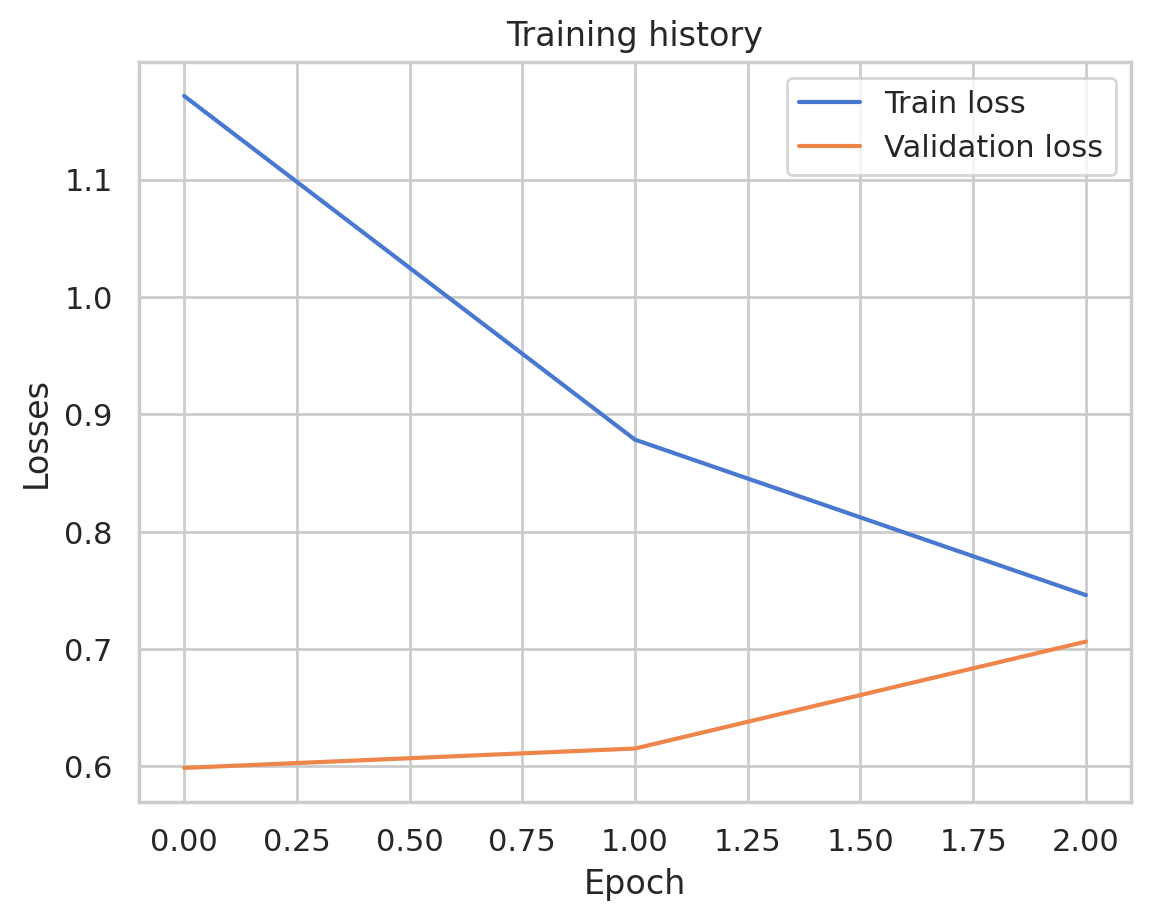

In [38]:
plt.plot(history['train_loss'], label='Train loss')
plt.plot(history['val_loss'], label='Validation loss')

plt.title('Training history')
plt.ylabel('Losses')
plt.xlabel('Epoch')
plt.legend()

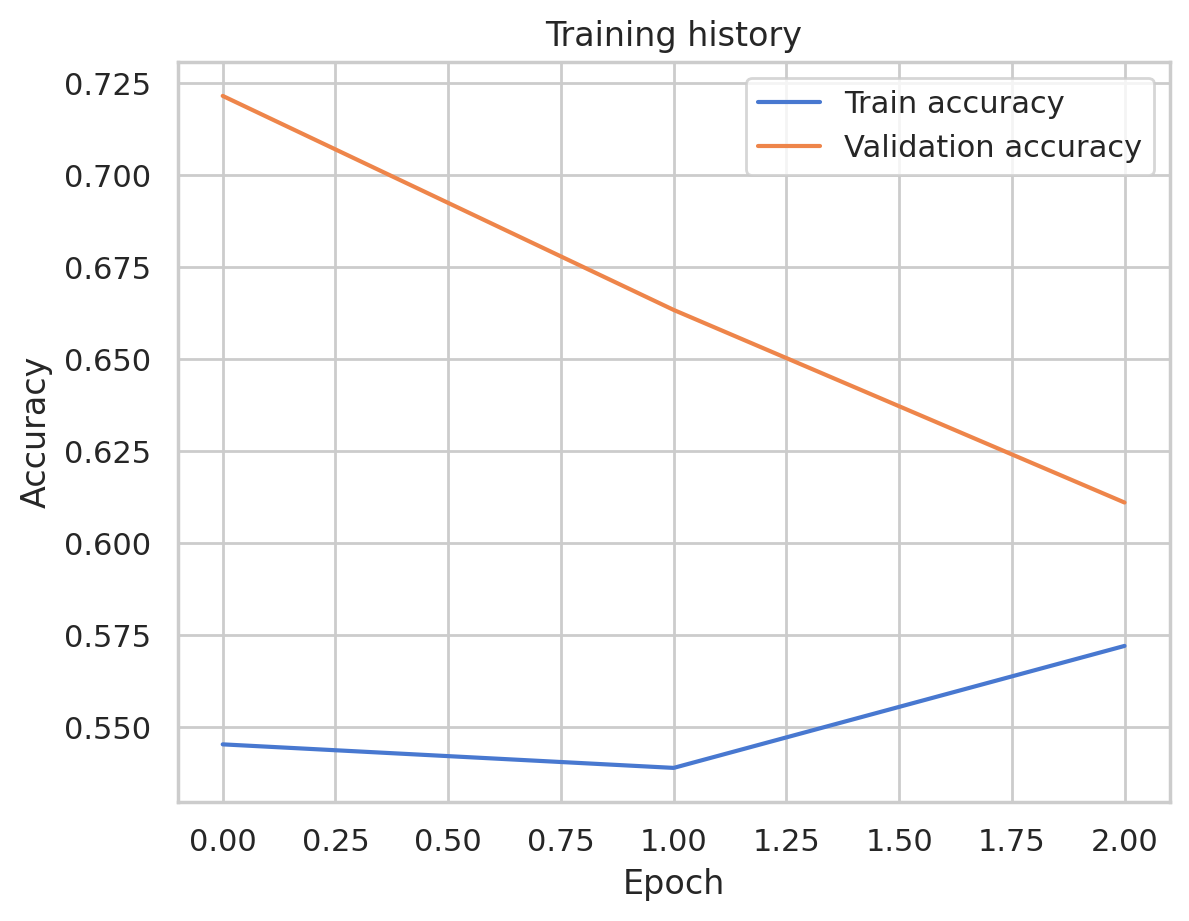

In [39]:
plt.plot(tr_acc, label='Train accuracy')
plt.plot(vl_acc, label='Validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

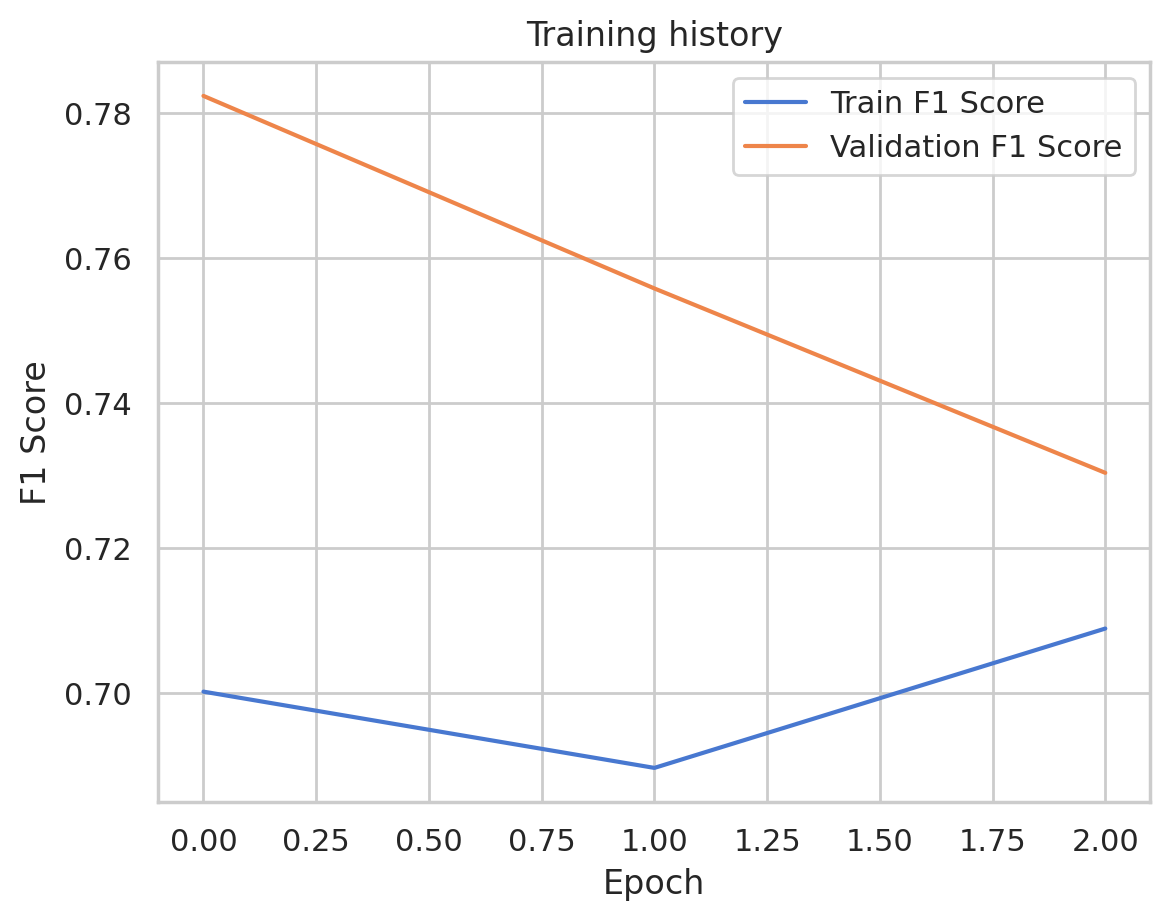

In [40]:
plt.plot(tr_f1, label='Train F1 Score')
plt.plot(vl_f1, label='Validation F1 Score')

plt.title('Training history')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
#plt.legend(loc=7)
plt.legend()

In [41]:
test_acc, test_f1, test_loss, test_tp, test_fp, test_tn, test_fn = eval_model(model, test_data_loader, loss_fn, device)

print(f'Test accuracy {test_acc} F1 score {test_f1} tp {test_tp} fp {test_fp} tn {test_tn} fn {test_fn}')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Test accuracy 0.611046511627907 F1 score 0.7303506731987 tp 906 fp 662 tn 145 fn 7


In [47]:
def get_predictions(model, data_loader):

  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []
  
  with torch.no_grad():
  
    for d in data_loader:
      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask)
      
      _, preds = torch.max(outputs, dim=1)
      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(targets)
  
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  
  return review_texts, predictions, prediction_probs, real_values

In [43]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model, test_data_loader)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

In [44]:
print(metrics.classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    Negativa       0.95      0.18      0.30       807
    Positiva       0.58      0.99      0.73       913

    accuracy                           0.61      1720
   macro avg       0.77      0.59      0.52      1720
weighted avg       0.75      0.61      0.53      1720



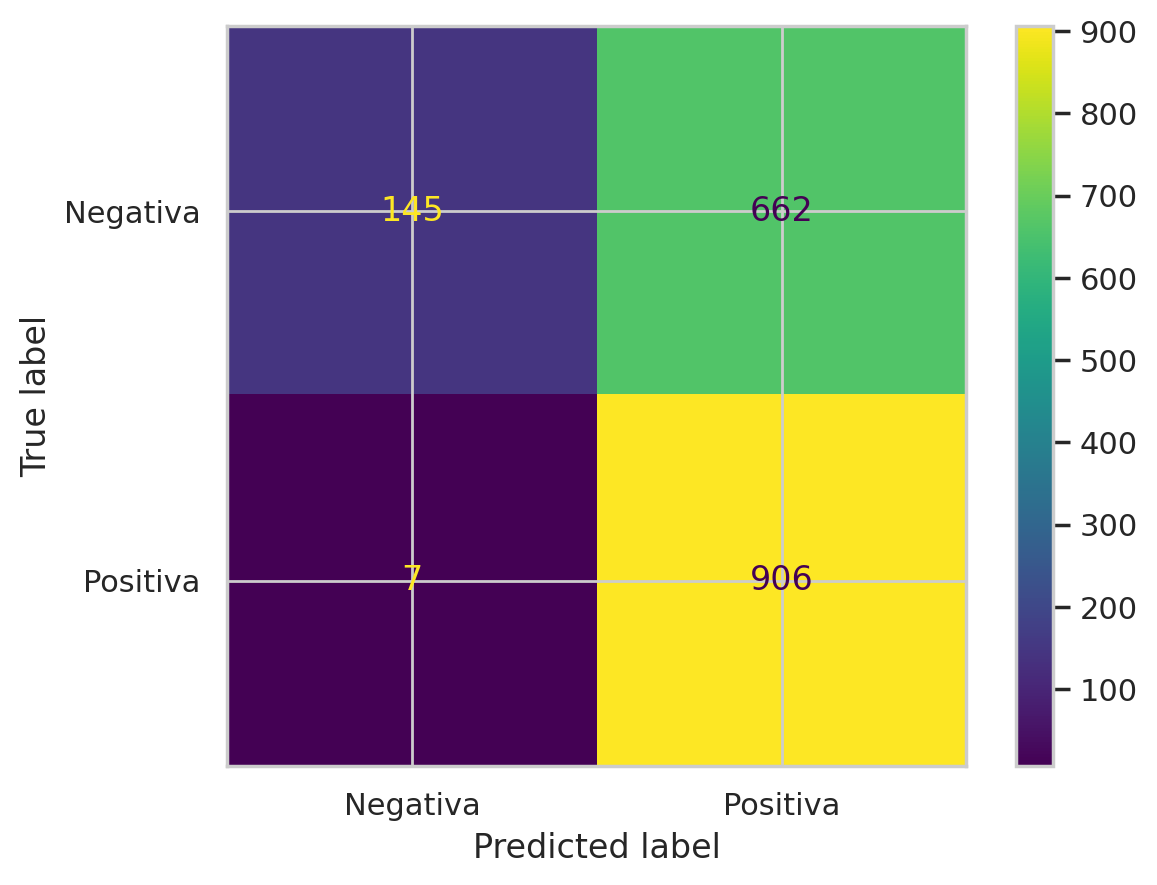

In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

#cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negativa', 'Positiva'])

cm_display.plot()

In [48]:
acc_bert = accuracy_score(y_test, y_pred)
f1_bert = 2 * confusion_matrix[1][1] / (2 * confusion_matrix[1][1] + confusion_matrix[0][1] + confusion_matrix[1][0])

In [59]:
results['SVM_bert'] = {0: acc_bert, 1: f1_bert}
print(f'Modelo Bertinbau - Acurácia: {acc_bert} | F1 score: {f1_bert}')

Modelo Bertinbau - Acurácia: 0.611046511627907 | F1 score: 0.7303506650544136


In [60]:
round(pd.DataFrame(results), 3)

,Métrica,SVM_BOW_Defaut,SVM_BOW_GS,SVM_emb,SVM_emb_gs,SVM_bert
0,Acc,0.802,0.804,0.665,0.719,0.611
1,F1,0.813,0.820,0.693,0.748,0.730


In [65]:
results = pd.DataFrame(results)
arq = 'results.csv'
filepath = path + arq
results.to_csv(filepath)

In [13]:
arq = 'results.csv'
filepath = path + arq
results = pd.read_csv(filepath)

nomes = ['Métrica','SVM_BOW_Defaut','SVM_BOW_GS','SVM_emb','SVM_emb_gs','SVM_bert']

results.columns=nomes

round(pd.DataFrame(results), 3)

,Métrica,SVM_BOW_Defaut,SVM_BOW_GS,SVM_emb,SVM_emb_gs,SVM_bert
0,Acc,0.802,0.804,0.665,0.719,0.611
1,F1,0.813,0.820,0.693,0.748,0.730
